# 机器学习练习 1 - 线性回归

本项目包含了吴恩达机器学习ex1的python实现，主要知识点为线性回归，题目内容可以查看当前目录下中的ex1.pdf
代码参考自网络（原作者[黄广海的github](https://github.com/fengdu78/Coursera-ML-AndrewNg-Notes)），添加了一部针对题目内容的中文翻译，及相关公式，注释。方便大家理解。

代码和数据都在当前目录下

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1. 单变量线性回归

单变量线性回归部分的任务是：   
需要根据城市人口数量，预测开小吃店的利润  
数据在ex1data1.txt里，第一列是城市人口数量，第二列是该城市小吃店利润。

### 1.1  读取并展示数据

In [3]:
path = 'ex1data1.txt'
data  = pd.read_csv( path , header=None , names=['Population' , 'Profit'])
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
data.describe() # 数据集的一些信息

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


绘制散点图， 看一下数据

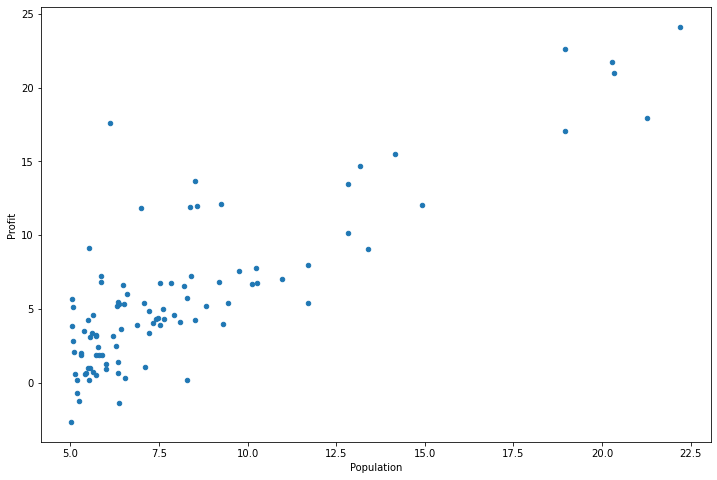

In [5]:

data.plot( kind='scatter' ,
          x='Population' , y='Profit' , 
          figsize=(12,8))



### 1.2  梯度下降

创建一个以参数θ为特征函数的代价函数 用于计算cost  
公式如下：  
$$J\left( \theta  \right)=\frac{1}{2m}\sum\limits_{i=1}^{m}{{{\left( {{h}_{\theta }}\left( {{x}^{(i)}} \right)-{{y}^{(i)}} \right)}^{2}}}$$
其中：\\[{{h}_{\theta }}\left( x \right)={{\theta }^{T}}X={{\theta }_{0}}{{x}_{0}}+{{\theta }_{1}}{{x}_{1}}+{{\theta }_{2}}{{x}_{2}}+...+{{\theta }_{n}}{{x}_{n}}\\] 

In [8]:
def computeCost(X , y , theta): 
    inner = np.power( (X * theta.T) - y , 2 )
    return np.sum(inner) / (2 * len(X))

在训练集中添加一列，以便可以使用向量化的解决方案来计算代价和梯度。

In [9]:
data.insert( 0,'Ones' , 1 )

In [10]:
cols = data.shape[1]
X = data.iloc[: , 0:cols-1]
y = data.iloc[: , cols-1 :cols ]


看一下训练集和标签

In [11]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [12]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


转换X和Y，确保后面正常使用它们。 同时初始化theta。

In [15]:
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))
# print(y)

In [14]:
type(X)

pandas.core.frame.DataFrame

In [16]:
theta

matrix([[0, 0]])

现在看下各个矩阵的维度

In [17]:
X.shape, theta.shape, y.shape

((97, 2), (1, 2), (97, 1))

计算代价函数 (theta初始值为0).  
答案应该是32.07

X.shape, theta.shape , y.shape

In [33]:
computeCost( X , y , theta )

32.072733877455676

# batch gradient decent（批量梯度下降）
$${{\theta }_{j}}:={{\theta }_{j}}-\alpha \frac{\partial }{\partial {{\theta }_{j}}}J\left( \theta  \right)$$

注：   
    J($\theta$)的变量是$\theta$，而不是X和y，意思是说，我们要通过变化$\theta$的值来使J($\theta$)变化，而不是变化X和y的值。  
    检查算法是否正常运行：  一个检查梯度下降是不是在正常运作的方式，是打印出每一步J($\theta$)的值，看他是不是一直都在减小，并且最后收敛至一个稳定的值。  
$\theta$最后的结果会用来预测小吃店在不同城市规模的利润。

In [20]:
def gradientDescent( X , y , theta , alpha , iters): 
    temp = np.matrix(np.zeros(theta.shape))
    parameters = int( theta.ravel().shape[1] )
    cost = np.zeros(iters)
    
    for i in range(iters):
        error = (X * theta.T) - y
        
        for j in range(parameters): 
            term = np.multiply( error , X[: , j] )
            temp[0,j] = theta[0 , j] - (alpha/len(y)) * np.sum(term)
        
        theta = temp
        cost[i] = computeCost(X , y , theta)
    
    
    
    
    return theta , cost
        

初始化一些附加变量 - 学习速率α和迭代次数。

In [21]:
alpha = 0.01
iters = 1000

现在让我们运行梯度下降算法，用训练集拟合theta

In [24]:
g , cost = gradientDescent(X , y , theta , alpha , iters)
g

matrix([[-3.24140214,  1.1272942 ]])

看下下训练后的误差

In [37]:
computeCost( X , y , g)


4.515955503078912

In [26]:
predict1 = [1,3.5]*g.T
print("predict1:",predict1)
predict2 = [1,7]*g.T
print("predict2:",predict2)
#预测35000和70000城市规模的小吃摊利润

predict1: [[0.70412756]]
predict2: [[4.64965727]]


现在我们来绘制线性模型以及数据，直观地看出它的拟合。

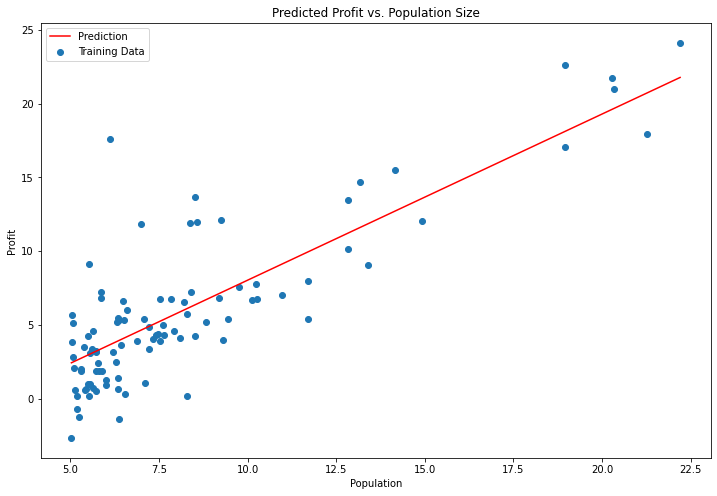

In [25]:
x = np.linspace(data.Population.min() , data.Population.max() , 100)
f = g[0,0] + (g[0,1] * x)

fig , ax = plt.subplots( figsize = (12,8))

ax.plot(x , f , 'r' , label = 'Prediction')
ax.scatter(data.Population , data.Profit , label = 'Training Data')

ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()


由于梯度方程式函数也在每次训练迭代中输出一个代价的向量，所以我们也可以绘制。 请注意，代价总是降低 - 这是凸优化问题的一个例子。

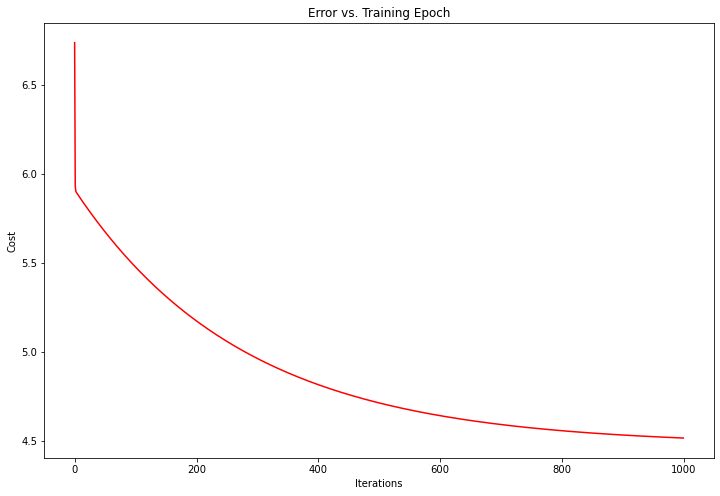

In [47]:
fig , ax = plt.subplots(figsize = (12,8))
ax.plot(np.arange(iters) , cost , 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()


## 多变量线性回归

练习1还包括一个房屋价格数据集，其中有2个变量（房子的大小，卧室的数量）和目标（房子的价格）。

In [27]:
path = 'ex1data2.txt'
data2 = pd.read_csv(path , header=None ,names=['Size' , 'Bedrooms' , 'Price'])
data2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


对于此任务，我们添加了另一个预处理步骤 - 特征归一化。 用pandas实现很简单

In [54]:
data2 = ( data2  - data2.mean() ) / data2.std()
data2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


现在重复第1部分的步骤，对数据集进行预处理，并对新数据集运行线性回归程序。

In [55]:
# add ones column
data2.insert( 0 , 'Ones' , 1 )

# set X (training data) and y (target variable)
cols = data2.shape[1]
X2 = data2.iloc[ : , 0:cols-1 ]
y2 = data2.iloc[ : , cols-1 : cols  ]

# convert to matrices and initialize theta
X2 = np.matrix(X2)
y2 = np.matrix(y2)

theta2 = np.matrix(np.array( [0,0,0]) )

# perform linear regression on the data set
g2 , cost2 = gradientDescent( X2 , y2 , theta2 , alpha , iters )

# get the cost (error) of the model
computeCost(X2 , y2 , g2)


0.130703369607719

我们也可以快速查看这一个的训练进程。（绘制代价的变化）

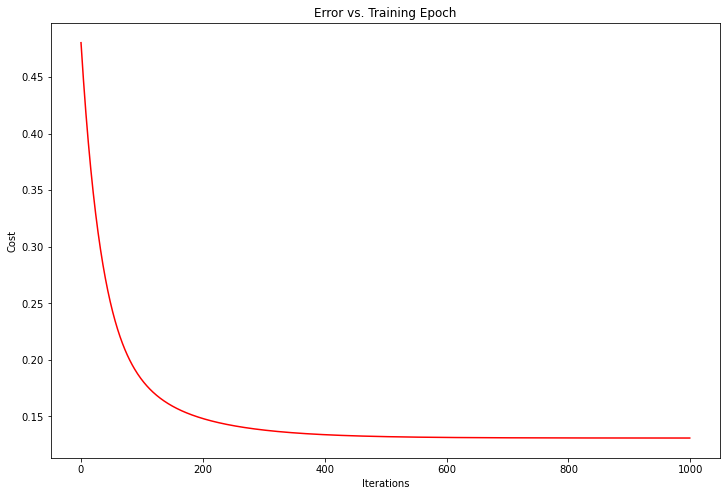

In [57]:
fig , ax = plt.subplots(figsize = (12,8) )
ax.plot(np.arange(iters) , cost2 , 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')
plt.show()

我们也可以使用scikit-learn的线性回归函数，而不是从头开始实现这些算法。 我们将scikit-learn的线性回归算法应用于第1部分的数据，并看看它的表现。

In [58]:
from sklearn import linear_model

model = linear_model.LinearRegression()
model.fit(X , y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

scikit-learn model的表现

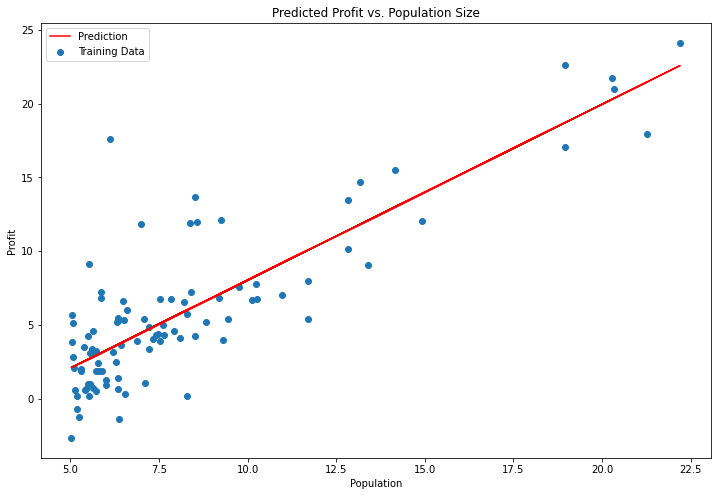

In [59]:
x = np.array( X[: , 1].A1 )
f = model.predict(X).flatten()

fig , ax = plt.subplots( figsize = (12,8))

ax.plot(x , f , 'r' , label = 'Prediction')
ax.scatter(data.Population , data.Profit , label = 'Training Data')

ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()

# 4. normal equation（正规方程）
正规方程是通过求解下面的方程来找出使得代价函数最小的参数的：$\frac{\partial }{\partial {{\theta }_{j}}}J\left( {{\theta }_{j}} \right)=0$ 。
 假设我们的训练集特征矩阵为 X（包含了${{x}_{0}}=1$）并且我们的训练集结果为向量 y，则利用正规方程解出向量 $\theta ={{\left( {{X}^{T}}X \right)}^{-1}}{{X}^{T}}y$ 。
上标T代表矩阵转置，上标-1 代表矩阵的逆。设矩阵$A={{X}^{T}}X$，则：${{\left( {{X}^{T}}X \right)}^{-1}}={{A}^{-1}}$

梯度下降与正规方程的比较：

梯度下降：需要选择学习率α，需要多次迭代，当特征数量n大时也能较好适用，适用于各种类型的模型	

正规方程：不需要选择学习率α，一次计算得出，需要计算${{\left( {{X}^{T}}X \right)}^{-1}}$，如果特征数量n较大则运算代价大，因为矩阵逆的计算时间复杂度为$O(n3)$，通常来说当$n$小于10000 时还是可以接受的，只适用于线性模型，不适合逻辑回归模型等其他模型

In [60]:
def nomalEqn(X , y): 
    theta = np.linalg.inv(X.T@X)@X.T@y
    return theta

In [63]:
final_theta2 = nomalEqn(X , y) # 
final_theta2   

matrix([[-3.89578088],
        [ 1.19303364]])

In [68]:
# 梯度下降得到的结果是matrix([[-3.24140214,  1.1272942 ]])

正规方程求解所得的结果

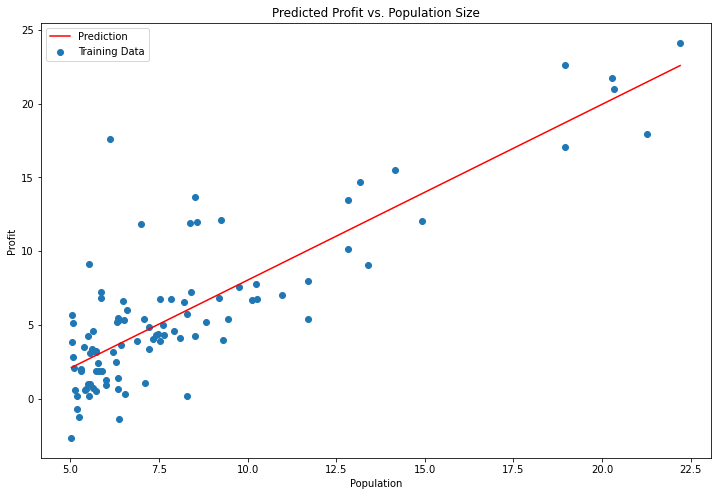

In [66]:
x = np.linspace(data.Population.min() , data.Population.max() , 100)
f = final_theta2[0,0] + (final_theta2[1,0] * x)

fig , ax = plt.subplots( figsize = (12,8))

ax.plot(x , f , 'r' , label = 'Prediction')
ax.scatter(data.Population , data.Profit , label = 'Training Data')

ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')
plt.show()


In [67]:
computeCost(X , y , final_theta2.T)

4.476971375975179

在练习2中，我们将看看分类问题的逻辑回归。